In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)

In [2]:
def jaccard_sim(array1_a, array1_b, array2_a, array2_b):
    assert len(array1_a)+len(array1_b) == len(array2_a)+len(array2_b)
    sim = (len(set(array1_a) & set(array2_a)) + len(set(array1_b) & set(array2_b)))/2329
    return sim

In [25]:
base_path = "/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Cross-Sample/1000K_resolution/3_CON/cell_type/"
cell_type_list = ["Ast", "End", "Exc", "Inh", "Mic", "Olig", "OPC"]
metacell = 200

In [26]:
Ast_a = np.load(base_path+"Ast/"+str(metacell)+"_metacell/ABclass/b_es_32.npy")[0]
Ast_b = np.load(base_path+"Ast/"+str(metacell)+"_metacell/ABclass/a_es_32.npy")[0]
End_a = np.load(base_path+"End/"+str(metacell)+"_metacell/ABclass/a_es_32.npy")[0]
End_b = np.load(base_path+"End/"+str(metacell)+"_metacell/ABclass/b_es_32.npy")[0]
Exc_a = np.load(base_path+"Exc/"+str(metacell)+"_metacell/ABclass/a_es_32.npy")[0]
Exc_b = np.load(base_path+"Exc/"+str(metacell)+"_metacell/ABclass/b_es_32.npy")[0]
Inh_a = np.load(base_path+"Inh/"+str(metacell)+"_metacell/ABclass/a_es_32.npy")[0]
Inh_b = np.load(base_path+"Inh/"+str(metacell)+"_metacell/ABclass/b_es_32.npy")[0]
Mic_a = np.load(base_path+"Mic/"+str(metacell)+"_metacell/ABclass/a_es_32.npy")[0]
Mic_b = np.load(base_path+"Mic/"+str(metacell)+"_metacell/ABclass/b_es_32.npy")[0]
Olig_a = np.load(base_path+"Olig/"+str(metacell)+"_metacell/ABclass/a_es_32.npy")[0]
Olig_b = np.load(base_path+"Olig/"+str(metacell)+"_metacell/ABclass/b_es_32.npy")[0]
OPC_a = np.load(base_path+"OPC/"+str(metacell)+"_metacell/ABclass/a_es_32.npy")[0]
OPC_b = np.load(base_path+"OPC/"+str(metacell)+"_metacell/ABclass/b_es_32.npy")[0]

In [27]:
a_list = [Ast_a, End_a, Exc_a, Inh_a, Mic_a, Olig_a, OPC_a]
b_list = [Ast_b, End_b, Exc_b, Inh_b, Mic_b, Olig_b, OPC_b]

# a_list = [Exc_a, Inh_a, Ast_a, End_a, Mic_a, Olig_a, OPC_a]
# b_list = [Exc_b, Inh_b, Ast_b, End_b, Mic_b, Olig_b, OPC_b]

In [52]:
A2B = np.zeros((7,7))

In [53]:
for i in range(7):
    for j in range(7):
        A2B[i][j] = (len((set(a_list[i])-set(a_list[j]))))/len(set(a_list[i]))

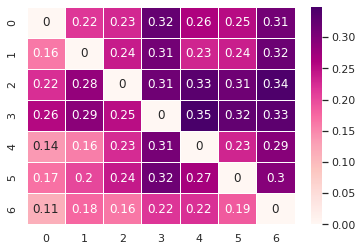

In [64]:
ax = sns.heatmap(A2B, linewidth=0.5, annot=True, cmap="RdPu")
plt = ax.get_figure()
plt.savefig("figure6_A2B_CON.eps", dpi=1000, format="eps")
plt.show()

In [55]:
B2A = np.zeros((7,7))

In [56]:
for i in range(7):
    for j in range(7):
        B2A[i][j] = (len((set(b_list[i])-set(b_list[j]))))/len(set(b_list[i]))

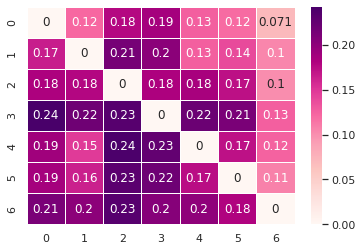

In [65]:
ax = sns.heatmap(B2A, linewidth=0.5, annot=True, cmap="RdPu")
plt = ax.get_figure()
plt.savefig("figure6_B2A_CON.eps", dpi=1000, format="eps")
plt.show()

In [19]:
jaccard = np.zeros((7,7))

In [20]:
for i in range(7):
    for j in range(7):
#         if i!=j:
#             jaccard[i][j]=jaccard_sim(a_list[i], b_list[i], a_list[j], b_list[j])
        jaccard[i][j]=jaccard_sim(a_list[i], b_list[i], a_list[j], b_list[j])

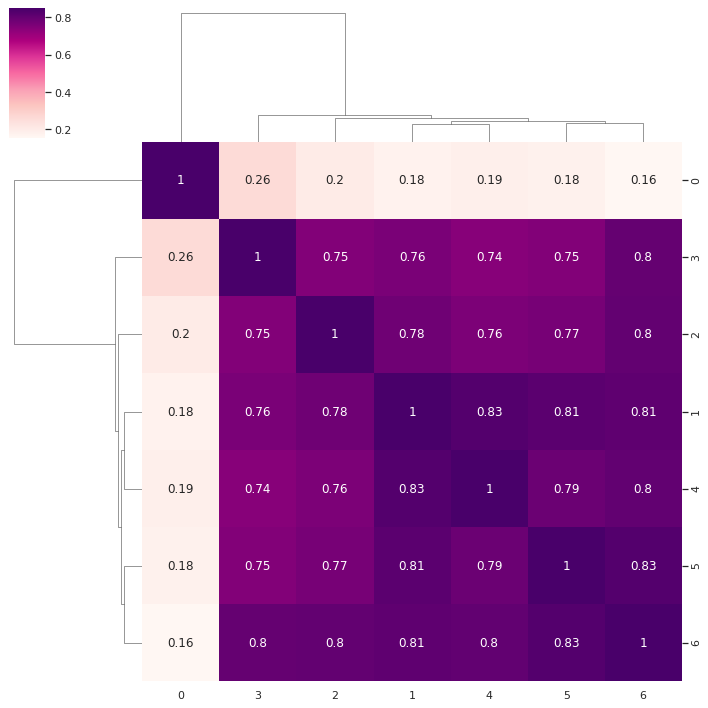

In [22]:
sns_plot = sns.clustermap(jaccard, cmap="RdPu", annot=True, vmax=0.85)
fig = sns_plot
fig.savefig("figure4_heatmap_Ast.eps", dpi=1000, format="eps")

In [8]:
jaccard_df = pd.DataFrame(jaccard)
# jaccard_corr = jaccard_df.corr()
# c = corrplot.Corrplot(jaccard_corr)
c = corrplot.Corrplot(jaccard_df)
c.plot(colorbar=True, rotation=45, method="circle", shrink=0.9)

NameError: name 'corrplot' is not defined

In [27]:
jaccard_df

,0,1,2,3,4,5,6
0,0.000000,0.747960,0.798626,0.779734,0.759124,0.766423,0.802490
1,0.747960,0.000000,0.741520,0.762130,0.738944,0.748819,0.798626
2,0.798626,0.741520,0.000000,0.823959,0.812795,0.820953,0.844998
3,0.779734,0.762130,0.823959,0.000000,0.830829,0.814942,0.809790
4,0.759124,0.738944,0.812795,0.830829,0.000000,0.788321,0.804637
5,0.766423,0.748819,0.820953,0.814942,0.788321,0.000000,0.829111
6,0.802490,0.798626,0.844998,0.809790,0.804637,0.829111,0.000000


In [35]:
np.array(jaccard_df).min(), jaccard_df.max()

(0.0,
 0    0.802490
 1    0.798626
 2    0.844998
 3    0.830829
 4    0.830829
 5    0.829111
 6    0.844998
 dtype: float64)

In [10]:
from biokit.viz import corrplot

In [20]:
import string
letters = string.ascii_uppercase[0:15]
df = pd.DataFrame(dict(( (k, np.random.random(10)+ord(k)-65) for k in letters)))
df = df.corr()

In [21]:
c = corrplot.Corrplot(df)

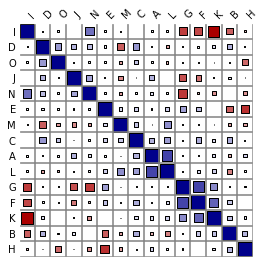

In [22]:
c.plot(colorbar=False, method='square', shrink=.9 ,rotation=45)

In [23]:
letters

'ABCDEFGHIJKLMNO'

In [9]:
jaccard

array([[0.        , 0.7479605 , 0.79862602, 0.77973379, 0.75912409,
        0.76642336, 0.80249034],
       [0.7479605 , 0.        , 0.74151997, 0.76212967, 0.73894375,
        0.74881924, 0.79862602],
       [0.79862602, 0.74151997, 0.        , 0.82395878, 0.81279519,
        0.8209532 , 0.84499785],
       [0.77973379, 0.76212967, 0.82395878, 0.        , 0.83082868,
        0.81494204, 0.80978961],
       [0.75912409, 0.73894375, 0.81279519, 0.83082868, 0.        ,
        0.78832117, 0.80463718],
       [0.76642336, 0.74881924, 0.8209532 , 0.81494204, 0.78832117,
        0.        , 0.82911121],
       [0.80249034, 0.79862602, 0.84499785, 0.80978961, 0.80463718,
        0.82911121, 0.        ]])

/home/zihend1/.conda/envs/py37/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


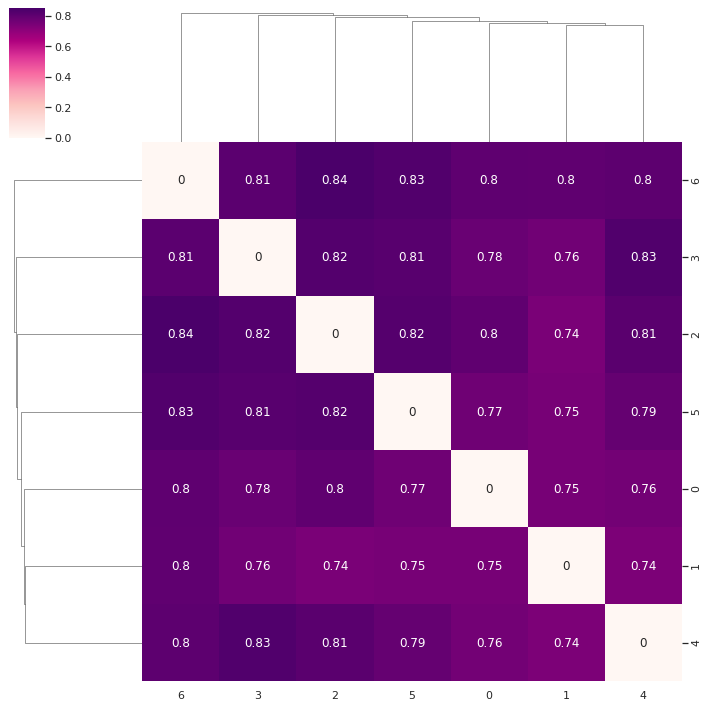

In [10]:
sns_plot = sns.clustermap(jaccard, cmap="RdPu", annot=True, vmax=0.85)
fig = sns_plot
# fig.savefig("figure4_heatmap.eps", dpi=1000, format="eps")

In [28]:
jaccard

array([[0.        , 0.7479605 , 0.79862602, 0.77973379, 0.75912409,
        0.76642336, 0.80249034],
       [0.7479605 , 0.        , 0.74151997, 0.76212967, 0.73894375,
        0.74881924, 0.79862602],
       [0.79862602, 0.74151997, 0.        , 0.82395878, 0.81279519,
        0.8209532 , 0.84499785],
       [0.77973379, 0.76212967, 0.82395878, 0.        , 0.83082868,
        0.81494204, 0.80978961],
       [0.75912409, 0.73894375, 0.81279519, 0.83082868, 0.        ,
        0.78832117, 0.80463718],
       [0.76642336, 0.74881924, 0.8209532 , 0.81494204, 0.78832117,
        0.        , 0.82911121],
       [0.80249034, 0.79862602, 0.84499785, 0.80978961, 0.80463718,
        0.82911121, 0.        ]])

In [82]:
hfc_b = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Bulk-ATAC-seq/hfc/ABclass/a_es_32.npy")[0]
hfc_a = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Bulk-ATAC-seq/hfc/ABclass/b_es_32.npy")[0]

In [83]:
a_list = [hfc_a ,Ast_a, End_a, Exc_a, Inh_a, Mic_a, Olig_a, OPC_a]
b_list = [hfc_b, Ast_b, End_b, Exc_b, Inh_b, Mic_b, Olig_b, OPC_b]

In [84]:
jaccard = np.zeros((8,8))

In [85]:
for i in range(8):
    for j in range(8):
        jaccard[i][j]=jaccard_sim(a_list[i], b_list[i], a_list[j], b_list[j])

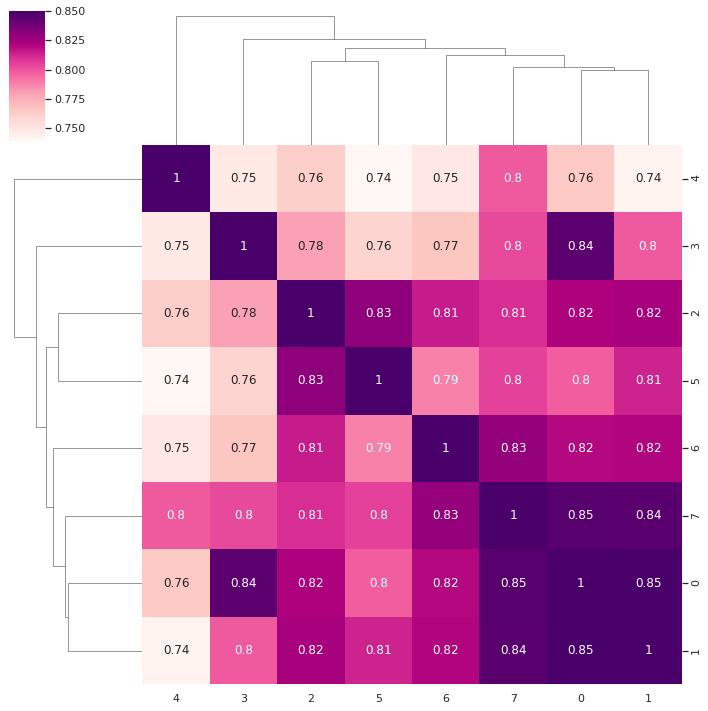

In [86]:
sns_plot = sns.clustermap(jaccard, cmap="RdPu", annot=True, vmax=0.85)
fig = sns_plot
fig.savefig("figure4_heatmap_with_hfc.eps", dpi=1000, format="eps")